In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time
import shap
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier 

In [3]:
X = pd.read_pickle('../Data_Visulization/X.pkl')
y = pd.read_pickle('../Data_Visulization/y.pkl')

In [4]:
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,8.589,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,3.445,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,5.438,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,7.673,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,5.203,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,3.425,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,5.772,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:

# split the data into developing and testing sets
X_dev,X_test,y_dev,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# scale the data
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size=0.2,random_state=42,stratify=y_dev)

## Balanced Decision Trees


In [7]:
# Your Code here
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_dev_over, y_dev_over = ros.fit_resample(X_dev,y_dev)

X_train,X_val,y_train,y_val = train_test_split(X_dev_over,y_dev_over,test_size=0.2,random_state=42,stratify=y_dev_over)
print(X_dev.shape)
print(X_dev_over.shape)
print(y_dev_over.value_counts())


(455, 25)
(570, 25)
0    285
1    285
Name: diagnosis, dtype: int64


In [8]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42)
roc_scores = cross_val_score(dtc,X_dev,y_dev,scoring='average_precision')
roc_scores_os = cross_val_score(dtc,X_dev_over,y_dev_over,scoring='average_precision')
print(roc_scores.mean())
print(roc_scores_os.mean())

0.8152621953451463
0.9267891108241985


score test: 0.9473684210526315
precision: 0.9434523809523809
recall: 0.9434523809523809
F1score: 0.9434523809523809

confusion matrix:


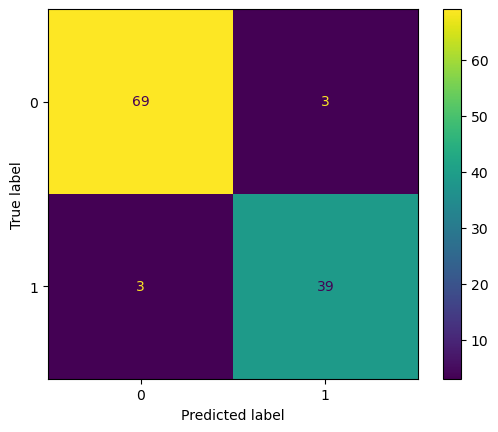

In [9]:
params = {'criterion' : ['gini','entropy'],
          'max_depth' : [3, 10, 20, 40]}


dtc = DecisionTreeClassifier(random_state=42)

gs1 = GridSearchCV(dtc, params, cv = 5)

gs1.fit(X_train, y_train)

y_pred = gs1.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("score test:", gs1.score(X_test,y_test))
print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels= gs1.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs1.classes_).plot()
plt.show()

In [10]:
explainer = shap.Explainer(gs1.predict, X_test)

shap_values = explainer(X_test)

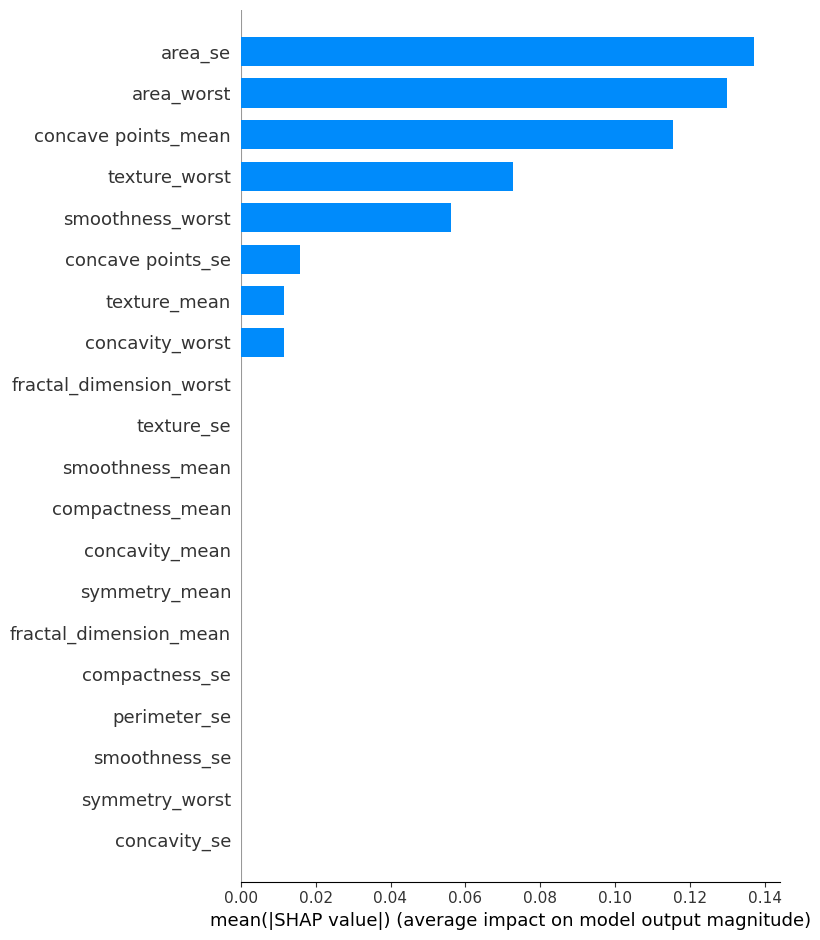

In [11]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

## Random Forest

score test: 0.9736842105263158
precision: 0.9741062479117941
recall: 0.9692460317460317
F1score: 0.9715828832571667

confusion matrix:


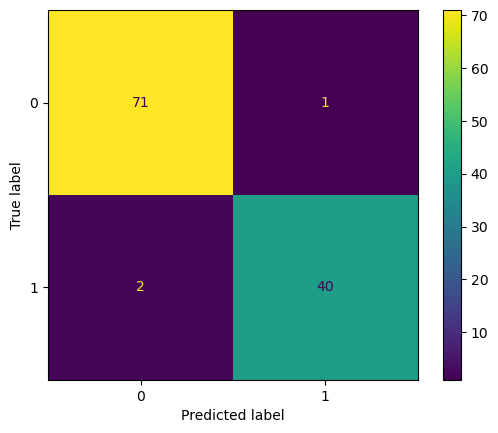

In [12]:
params = {'n_estimators' : [50, 100, 200,300],
          'max_depth' : [3, 10, 20, 40]}


rf = RandomForestClassifier(random_state=42)

gs1 = GridSearchCV(rf, params, cv = 5)

gs1.fit(X_train, y_train)

y_pred = gs1.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')
print("score test:", gs1.score(X_test,y_test))
print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels= gs1.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs1.classes_).plot()
plt.show()

In [13]:
explainer = shap.Explainer(gs1.predict, X_test)

shap_values = explainer(X_test)

Permutation explainer: 115it [00:10,  1.75s/it]                                                                         


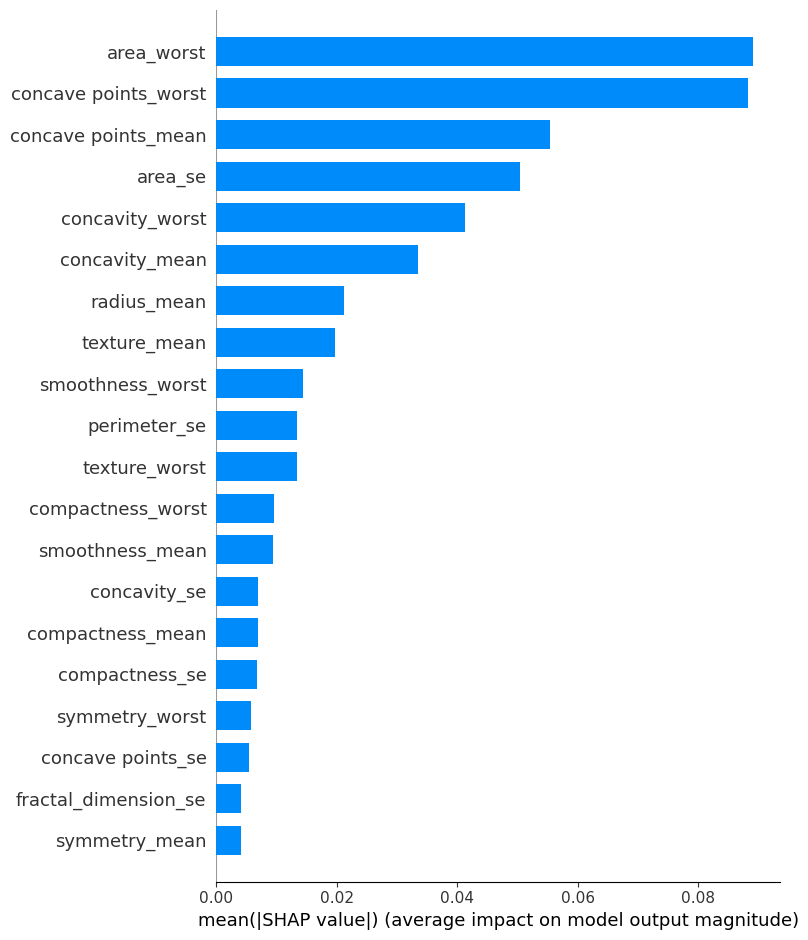

In [14]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

## XG boost

Time: 10.659353971481323 seconds
best parameters are {'learning_rate': 0.1, 'min_samples_split': 2, 'n_estimators': 70}
model performance on test dataset 0.9649122807017544
precision: 0.9672297297297296
recall: 0.9573412698412699
F1score: 0.9619111259605747

confusion matrix:


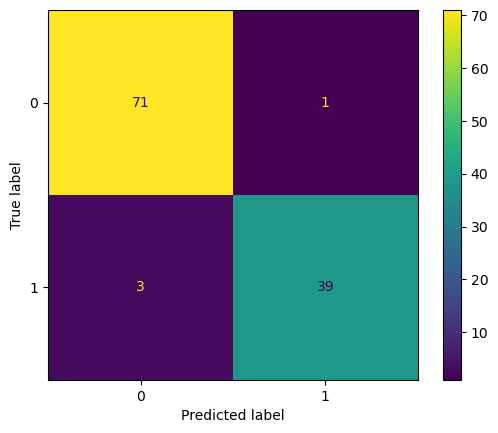

In [15]:

start_time = time.time()

params = {'min_samples_split' : [2,10,50],
          'learning_rate' : [0.1,7,100],
          'n_estimators' : [20, 40, 70]}

gs2 = GridSearchCV(GradientBoostingClassifier(), params, cv = 5)

gs2.fit(X_dev, y_dev)

print("Time: {} seconds".format(time.time() - start_time))

print("best parameters are", gs2.best_params_)

print("model performance on test dataset", gs2.score(X_test, y_test))

y_pred = gs2.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=gs2.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs2.classes_).plot()
plt.show()

In [16]:
explainer = shap.Explainer(gs2.predict, X_test)

shap_values = explainer(X_test)

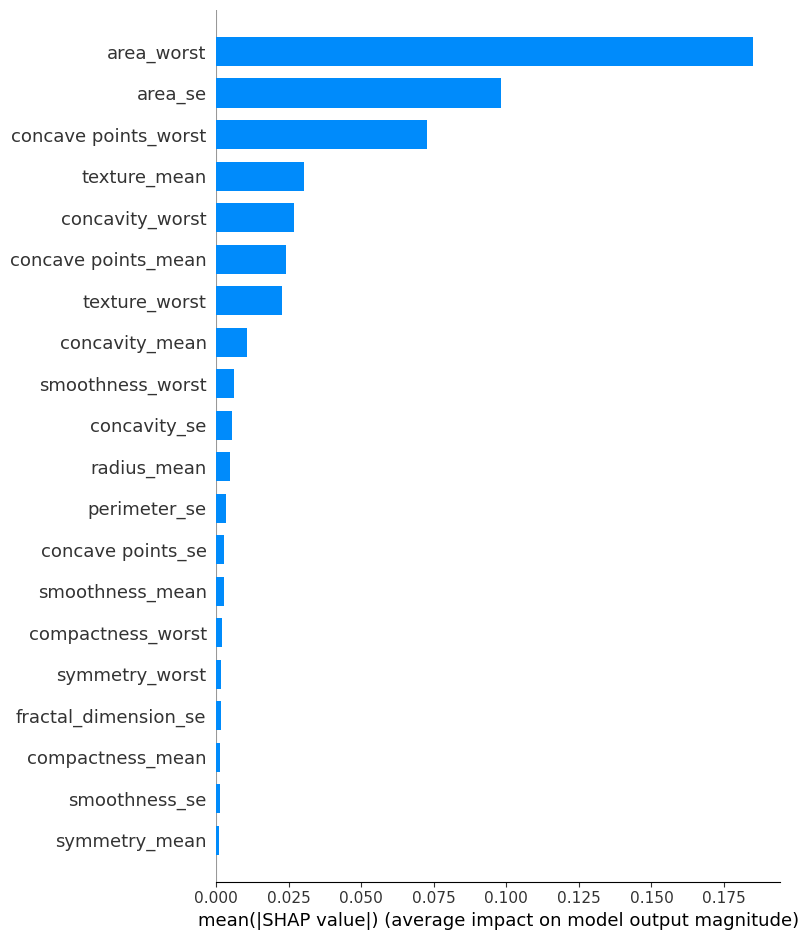

In [17]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

## Hist Gradient Boosting

In [ ]:

start_time = time.time()

params = {"max_depth": [5, 10],
            "learning_rate": [0.1, 1],
             'l2_regularization': np.logspace(-1, 2, 2)}

gs3 = GridSearchCV(HistGradientBoostingClassifier(), params, cv = 5)


gs3.fit(X_dev, y_dev)

print("Time: {} seconds".format(time.time() - start_time))

print("best parameters are", gs3.best_params_)

print("model performance on test dataset", gs3.score(X_test, y_test))


y_pred = gs3.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=gs3.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs3.classes_).plot()
plt.show()

## XGB

best parameters are {'eta': 0.01, 'lambda': 0.001, 'max_depth': 10}
model performance on testdataset 0.9912280701754386
precision: 0.9931506849315068
recall: 0.9880952380952381
F1score: 0.9905276277523889

confusion matrix:


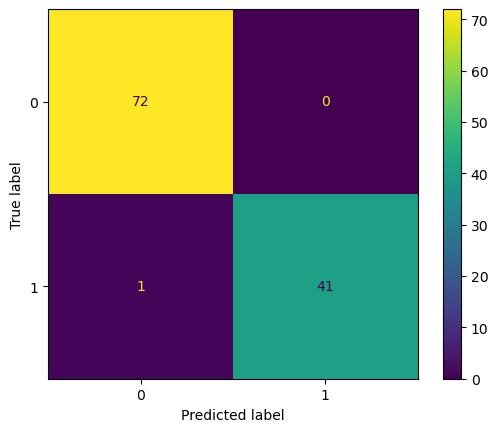

In [18]:

params = {'max_depth': [5, 10],
          'eta': np.logspace(-2, 1, 2),
          'lambda': np.logspace(-3, 1, 2)}

gs4 = GridSearchCV(XGBClassifier(), params, cv = 10)

gs4.fit(X_dev, y_dev)

print("best parameters are", gs4.best_params_)
print("model performance on testdataset", gs4.score(X_test, y_test))

y_pred = gs4.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])

print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=gs4.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs4.classes_).plot()
plt.show()

## Comparaison

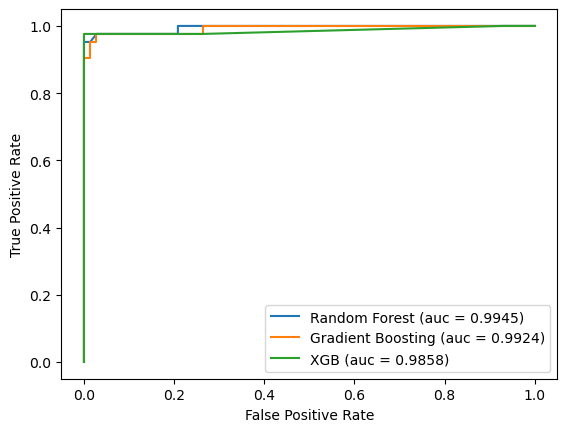

<Figure size 1500x2000 with 0 Axes>

In [19]:
plt.figure(0).clf()

y_pred = gs1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Random Forest (auc = %0.4f)' % auc)


y_pred = gs2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Gradient Boosting (auc = %0.4f)' % auc)

# y_pred = gs3.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# plt.plot(fpr, tpr, label='Hist Gradient Boosting (auc = %0.4f)' % auc)

y_pred = gs4.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='XGB (auc = %0.4f)' % auc)

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.figure(figsize=(15, 20))
plt.show()